

# Project: Medical Appointment No Shows

*Author : Sahand Niasti*

*April, 2020*


![Image](https://www.everseat.com/wp-content/uploads/2015/10/appointment_1500x1000-800x400.png)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1- Introduction


Many patients all around the world make an appointment, before visiting a doctor. but with all the instrcution they receive, some of them do not show up on the appointment date. missing a scheduled date like this would miss an opportunity for other in-need patients and can cause delays and extra costs for doctors and hospitals. but why a person would have made an appointment does not show up? this is the question we will try to answer here.

This dataset collected information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up on their appointment.A number of characteristics about the patient are included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- 'No-show': it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

The original dataset can be found here: [Link](https://www.kaggle.com/joniarroba/noshowappointments)



### Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print('table size:',df.shape)
df.describe(include = "all")

table size: (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [4]:
print('------------ Basic information---------------- \n \n')
print(df.info())
print('\n \n')

print('------------ Data type of each column---------------- \n \n')
print(df.dtypes)
print('\n \n')

print('------------ Number of unique values in each column---------------- \n \n')
print(df.nunique())
print('\n \n')

print('------------ Which columns have no values?---------------- \n \n')
print(df.isnull().sum())

------------ Basic information---------------- 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None

 

------------ Data type of each column---------------- 
 

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age        

### Questions

now that we have become more familiar with the dataset, some questions are risen to be answered, which can be seen below.
- Does the plus point given to patients(scholarship or sms notification) have any correlation with appointments?
- Does the number of inabilities can play an important role?
- Do patients who have made an appointment more than once miss more appointment time or vice versa?
- Does gender play an important role?
- Can we find any relationship with the amount of time between appointmentday and scheduleday  and apperance on appointment date?
- In which neighbourhood more patient did not show up?
- Which age groups miss more appointment date?
- Can we predict which patients will show up on the appointment date?


<a id='wrangling'></a>
## 2- Data Wrangling



In this section we investigate data to detect any anomaly and make it ready for the next phase, which is exploratory data analysis. 

the dataset has beeen imported in previous section and some basic information have been extracted as well. first of all, we need to change the date format in scheduledDay and Appointmentday to datetime. Then, when we scrutinized the info, we found out that there is a patient with year -1. This patient will be replaced with 0 and categorized as a child with less than a year old. another issue is the handicap which has named 'handcap' on the table. the title need to be changed and data should be binary, meaning that whether a patient have handicapped problem or not. numbers other than 0 and 1 should be amended.

In [9]:
# change format
df['ScheduledDay'] = df['ScheduledDay'].str.extract('(....-..-..)')
df['AppointmentDay'] = df['AppointmentDay'].str.extract('(....-..-..)')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format="%Y-%m-%d")
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format="%Y-%m-%d")
df[['AppointmentDay','ScheduledDay']].dtypes

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object

In [10]:
#add new column
df['Difference'] = df['AppointmentDay'] - df['ScheduledDay']

df = df[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay','Difference', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show' ]]

In [11]:
#rename columns
df.rename(columns = {'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace = True)

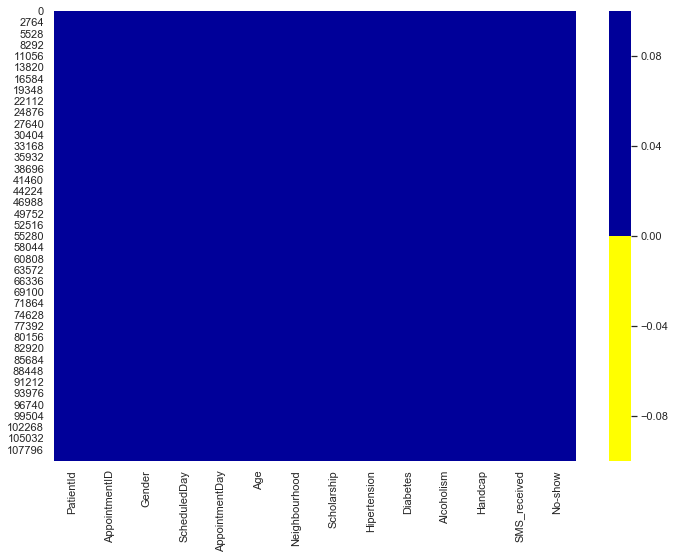

In [6]:
#missing values
sns.set(rc={'figure.figsize':(11.7,8.27)})
colours = ['#ffff00','#000099'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [12]:
#handicap 
print("Number of handicap (before) \n", df.Handicap.value_counts())

#iterate over patients that have more than one handicap
Handicap_plus_1 = df[df['Handicap'] > 1]
for i in Handicap_plus_1.index:
    df.loc[i,'Handicap'] = 1

print("\n Number of handicap (after) \n", df.Handicap.value_counts())    


Number of handicap (before) 
 0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

 Number of handicap (after) 
 0    108286
1      2241
Name: Handicap, dtype: int64


In [13]:
#change the age to zero
df.loc[df[df['Age'] < 0].index ,'Age'] = 0
    

<a id='eda'></a>
## 3- Exploratory Data Analysis


Now that the data is cleaned, analysis can be started. at first we plot a histogram of each feature to gain more information about the disparity of data. then a function will be defined to enable us to compare each column in the number of appereance on appointment date and the number of missing one. this method can help to distinguish features which had effect on showing up on appointments. After that, we define our own features to calculate their effects as well, and finally, a support vector machine algorithm, which is a machine learning algorithm will be run to help us train a model to predict which patients will be shown up in the future.

### Basic info

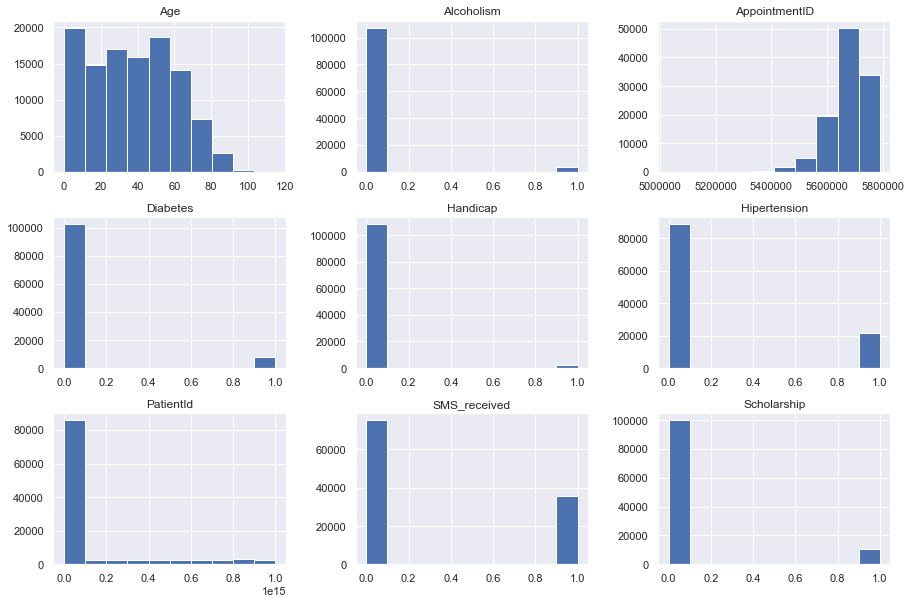

In [11]:
# histogram of each variable
df.hist(figsize=(15,10));

In [14]:
#correlation between each variable
df_n = df.copy()
df_n['No_show'] = df_n['No_show'].replace({'No': 0, 'Yes': 1})
df_n.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.008659,-0.009749,-0.001461
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.015126,-0.256618,-0.162602
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292392,0.095811,0.083743,0.012643,-0.060319
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.009103,0.001194,0.029135
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.084852,-0.006267,-0.035701
Diabetes,0.001605,0.022628,0.292392,-0.024894,0.433086,1.000000,0.018474,0.059145,-0.014550,-0.015180
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.003692,-0.026147,-0.000196
Handicap,-0.008659,0.015126,0.083743,-0.009103,0.084852,0.059145,0.003692,1.000000,-0.025220,-0.007281
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.025220,1.000000,0.126431
No_show,-0.001461,-0.162602,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.007281,0.126431,1.000000


When we look at the histograms, the first thing that catch our eyes is that most of the patients did not have any inabiliy issues such as handicap or other problems like alchololism, Diabetes or hipertension, which can be concluded that there must be another reason why they did not show up on their appointment date. let's not jump into the conclusion, but this is what we first see. then the correlation table shows us there is not any strong correlation between variable, except between hipertension and age and diabetes. but let's dive deeper into the analysis.

### Define a comparative function

The main goal here is to make a comparison between patients who have successfully met their doctors on the scheduled date and the ones who missed it. So, a function was defined to help us make that comparison in different situation to see whether there are any relationship between our variables and show up date on the appointment or not.

In [15]:

def no_show_up(x):
    
    df_groupby = df.groupby([x])['No_show'].count().to_frame()

    #number of patients who did not cancel the appointment time by the target column
    df_groupby_no = df[df['No_show'] == 'No'].groupby([x])['No_show'].count()
    #number of patients who did not cancel the appointment time by the target column
    df_groupby_yes = df[df['No_show'] == 'Yes'].groupby([x])['No_show'].count()

    #merge tables
    df_groupby = df_groupby.merge(df_groupby_no, left_on = x , right_on = x ).merge(df_groupby_yes, left_on = x, right_on = x)
    df_groupby.rename(columns={ 'No_show_x': 'Total', 'No_show_y': 'Show_up', 'No_show': 'No_show_up'}, inplace = True)

    #percentage of No show by the target column
    df_groupby['No_show_up_%'] = df_groupby['No_show_up'] / df_groupby['Total']
    
    return df_groupby

### In which neighbourhood more patient did not show up?

At first, let's see which neighbourhoods are notorious for not showing up.

In [14]:
df_neighbourhood = no_show_up('Neighbourhood').sort_values('No_show_up_%', ascending = False).reset_index()
df_neighbourhood.head(10)

,Neighbourhood,Total,Show_up,No_show_up,No_show_up_%
0,SANTOS DUMONT,1276,907,369,0.289185
1,SANTA CECÍLIA,448,325,123,0.274554
2,SANTA CLARA,506,372,134,0.264822
3,ITARARÉ,3514,2591,923,0.262664
4,JESUS DE NAZARETH,2853,2157,696,0.243954
5,HORTO,175,133,42,0.240000
6,ILHA DO PRÍNCIPE,2266,1734,532,0.234775
7,CARATOÍRA,2565,1974,591,0.230409
8,ANDORINHAS,2262,1741,521,0.230327
9,PRAIA DO SUÁ,1288,994,294,0.228261


In [15]:
df_neighbourhood.tail(10)

,Neighbourhood,Total,Show_up,No_show_up,No_show_up_%
69,VILA RUBIM,851,710,141,0.165687
70,DO QUADRO,849,709,140,0.164900
71,JARDIM DA PENHA,3877,3246,631,0.162755
72,SANTA MARTHA,3131,2635,496,0.158416
73,DO CABRAL,560,472,88,0.157143
74,DE LOURDES,305,258,47,0.154098
75,SOLON BORGES,469,400,69,0.147122
76,MÁRIO CYPRESTE,371,317,54,0.145553
77,AEROPORTO,8,7,1,0.125000
78,ILHA DO BOI,35,32,3,0.085714


Text(0, 0.5, 'Percentage')

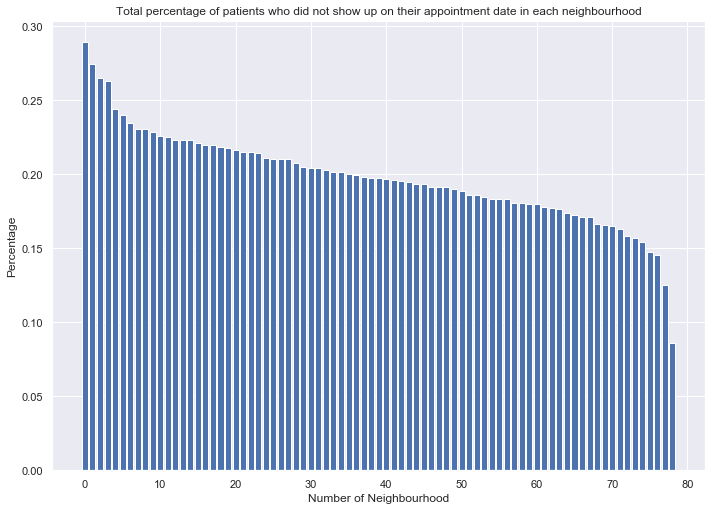

In [16]:
ind = np.arange(len(df_neighbourhood))
plt.bar(ind, df_neighbourhood['No_show_up_%'])
plt.title('Total percentage of patients who did not show up on their appointment date in each neighbourhood')
plt.xlabel('Number of Neighbourhood')
plt.ylabel('Percentage')

As we can see, the chart is sorted by percentage and by looking at tables above the figure, it is easy to see which neighbourhoods have the most or the least No_show percentage.The only neighbourhood that less than 10 percent of patients did not show up was in 'ILHA DO BOI'. On the other hand, there are 4 neighbourhoods that 1 out of 4 patient miss the appointment. 

### Does gender play an important role?

Another question which can pop up on our mind is whether men miss the appointment or women? in this dataset, the number of female patients are more than double the number of male ones,but interestingly, both groups missed a fifth of their appointment.

In [17]:
df_gender = no_show_up('Gender')
df_gender

,Total,Show_up,No_show_up,No_show_up_%
Gender,,,,
F,71840,57246,14594,0.203146
M,38687,30962,7725,0.199679


Text(0, 0.5, 'Percentage')

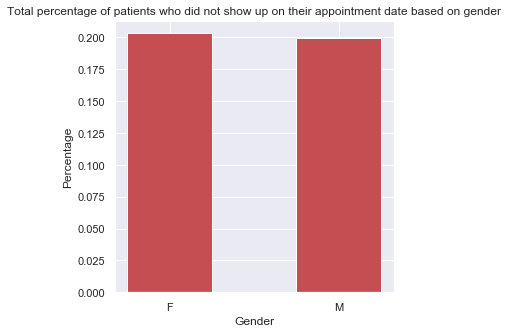

In [18]:
plt.figure(figsize=(5,5))
plt.bar(df_gender.index, df_gender['No_show_up_%'], width = 0.5, color= 'r')
plt.title('Total percentage of patients who did not show up on their appointment date based on gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

### Does the plus point given to patients(scholarship or sms notification) have any correlation with appointments?

In [16]:
df_scholarship = no_show_up('Scholarship')
df_scholarship

,Total,Show_up,No_show_up,No_show_up_%
Scholarship,,,,
0,99666,79925,19741,0.198072
1,10861,8283,2578,0.237363


In [17]:
df_sms = no_show_up('SMS_received')
df_sms 

,Total,Show_up,No_show_up,No_show_up_%
SMS_received,,,,
0,75045,62510,12535,0.167033
1,35482,25698,9784,0.275745


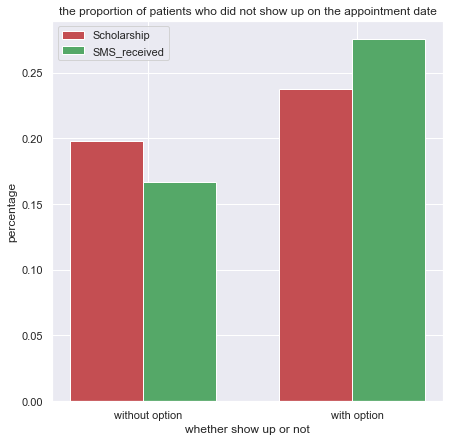

In [18]:
plt.figure(figsize=(7,7))
width = 0.35
plt.bar(df_scholarship.index, df_scholarship['No_show_up_%'],width = width, color = 'r', label = 'Scholarship' )
plt.bar(df_sms.index + width, df_sms['No_show_up_%'],width = width, color = 'g', label = 'SMS_received' )
plt.title('the proportion of patients who did not show up on the appointment date')
plt.xticks([0.2,1.2], ['without option', 'with option'])
plt.xlabel('whether show up or not')
plt.ylabel('percentage')
plt.legend()

As we can see, in both cases when patients are notified by SMS or grant a scholarship for health issue, the overall rate of missing the appointment increase, which is odd!!. more than a quarter of all patients who have received sms actually missed the appointment while those who did not receive one show up more(around 15 percent of them did not show up)

In [22]:
df['plus'] = 0
df['plus'] = df[['Scholarship','SMS_received']].sum(axis = 1)
df_plus = no_show_up('plus')
df_plus

,Total,Show_up,No_show_up,No_show_up_%
plus,,,,
0,67689,56548,11141,0.164591
1,39333,29339,9994,0.254087
2,3505,2321,1184,0.337803


after the interesting result calculated above, we decided to see how patients who have both plus points act. so, there is a table with 3 columns above showing patients who have not received any (0),patients who have either received sms or scholarship (1), and patients who had both ones (2).

Text(0, 0.5, 'percentage')

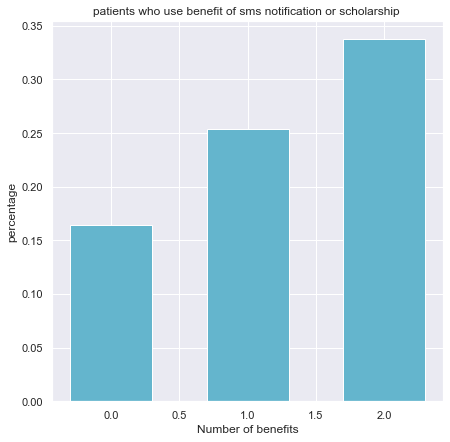

In [23]:
plt.figure(figsize=(7,7))
width = 0.6
plt.bar(df_plus.index, df_plus['No_show_up_%'],width = width, color = 'c' )
plt.title('patients who use benefit of sms notification or scholarship ')
plt.xlabel('Number of benefits')
plt.ylabel('percentage')

Interestingly, the more options are given to patients, the more did not show up on appointment date. the ones who have received a sms and had familia bolsa scholarship seems to be more confident to not show up on the scheduled date.

### Does the number of inabilities can play an important role?

in this dataset, there are some columns with basic health problems of patients. we have categorise them as inability to see whether any type of health issue can be correlated to missing appointment or not.

In [62]:
df_hipertension = no_show_up('Hipertension')
df_hipertension

,Total,Show_up,No_show_up,No_show_up_%
Hipertension,,,,
0,88726,70179,18547,0.209037
1,21801,18029,3772,0.173020


In [63]:
df_diabetes = no_show_up('Diabetes')
df_diabetes

,Total,Show_up,No_show_up,No_show_up_%
Diabetes,,,,
0,102584,81695,20889,0.203628
1,7943,6513,1430,0.180033


In [26]:
df_alcoholism = no_show_up('Alcoholism')
df_alcoholism 

,Total,Show_up,No_show_up,No_show_up_%
Alcoholism,,,,
0,107167,85525,21642,0.201946
1,3360,2683,677,0.201488


In [27]:
df_handicap = no_show_up('Handicap')
df_handicap

,Total,Show_up,No_show_up,No_show_up_%
Handicap,,,,
0,108286,86374,21912,0.202353
1,2241,1834,407,0.181615


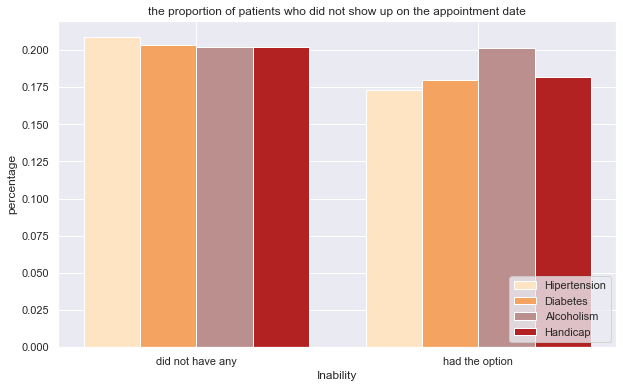

In [74]:
plt.figure(figsize=(10,6))
width = 0.2
plt.bar(df_hipertension.index, df_hipertension['No_show_up_%'],width = width, color = 'bisque', label = 'Hipertension' )
plt.bar(df_diabetes.index + width, df_diabetes['No_show_up_%'],width = width, color = 'sandybrown', label = 'Diabetes' )
plt.bar(df_alcoholism.index + 2*width , df_alcoholism['No_show_up_%'],width = width, color = 'rosybrown', label = 'Alcoholism' )
plt.bar(df_handicap.index + 3*width, df_handicap['No_show_up_%'],width = width, color = 'firebrick', label = 'Handicap' )
plt.title('the proportion of patients who did not show up on the appointment date')
plt.xticks([0.3,1.3], ['did not have any', 'had the option'])
plt.xlabel('Inability')
plt.ylabel('percentage')
plt.legend(loc = 'lower right')

there is not any significant differences when a patient ,for example, has diabetes or not on apperance on the appointment date. but overally, the ones who had any problem, ranging from alocholism to any handicap mentioned in the table showed up a bit more than more healthy patients on appointments.

Now, let's see the effrct of more than one inability at the same time. a patient can be diabetes and alcoholic and want to visit a doctor. so is he/she is going to show up more o the more healthy ones?

In [28]:
df['Inability_degree'] = 0  
#group the inabilities
df['Inability_degree'] = df[['Hipertension','Diabetes','Alcoholism','Handicap' ]].sum(axis = 1)
df_inability_degree = no_show_up('Inability_degree')
df_inability_degree

,Total,Show_up,No_show_up,No_show_up_%
Inability_degree,,,,
0,84115,66512,17603,0.209273
1,18123,14874,3249,0.179275
2,7658,6290,1368,0.178637
3,618,523,95,0.153722
4,13,9,4,0.307692


Now, let's see how patients who have multiple inability behave on appointment date.

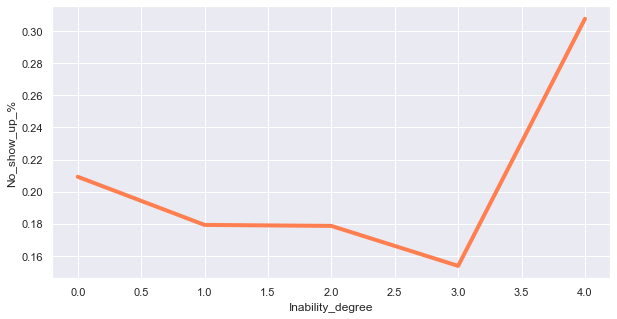

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x= df_inability_degree.index, y= df_inability_degree['No_show_up_%'], color="coral",linewidth=4, data = df_inability_degree)

with the exception of ones who have all the problem at the same time(group number 4) who are just 13 among more than 100k, it seems that the more health problem patients have, the less appointment date will be missed by them.

### Which age groups miss more appointment date?

so, in this question, the aim is to see whether there is any relationship between age and not showing up on date or not. so we group our patients based on percentile given below into 4 different groups,namely child, young adults, middle aged and old ones. now it is easier to find any pattern among age groups.

In [30]:
# let's see the age percentile of the dataset
df['Age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [19]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0 ,18 ,37,55, 115]
#labels for four age group
bin_names = ['child','young_adult','middle_aged','old']
#age group column
df['Age_groups'] = pd.cut(df['Age'], bin_edges, labels = bin_names)

# a part of the table
df[['Age', 'Age_groups','No_show']].head()

,Age,Age_groups,No_show
0,62,old,No
1,56,old,No
2,62,old,No
3,8,child,No
4,56,old,No


In [20]:
df_age_groups = no_show_up('Age_groups')
df_age_groups

,Total,Show_up,No_show_up,No_show_up_%
Age_groups,,,,
child,25327,19619,5708,0.225372
young_adult,27250,20836,6414,0.235376
middle_aged,26906,21651,5255,0.195310
old,27504,23201,4303,0.156450


Text(0, 0.5, 'Percentage')

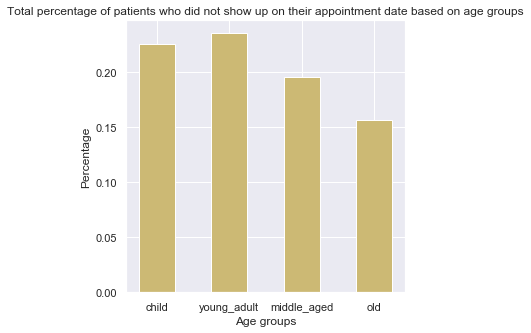

In [33]:
plt.figure(figsize=(5,5))
plt.bar(df_age_groups.index, df_age_groups['No_show_up_%'], width = 0.5, color= 'y')
plt.title('Total percentage of patients who did not show up on their appointment date based on age groups')
plt.xlabel('Age groups')
plt.ylabel('Percentage')

Number of patients in each group is roughly equal.but as we can see, more young adult between 19 to 37 years old intentionally or unintentionally miss the apointment date. on the other hand, old ones aged more than 55, pay more attention to these dates and around 15 percent of them miss the appointment.

### Do patients who have made an appointment more than once miss more appointment time or vice versa?

when we digged more into the dataset, we found out that there are some patient id which had more than one appointment date.so, it seem to be worthy to see is there any relationship betwen these two group or not. therefore, we separate them into two groups and calculate which one missed more appointment.

In [34]:
#patients with more than one appointment date
df_patient_count = df['PatientId'].value_counts().to_frame()
df['more_than_one_visit'] = 0

#loop to define each patient
for index, row in df.iterrows():
    
    id_p = row['PatientId']
    
    id_count = df_patient_count.loc[id_p]
    if int(id_count) > 1:
        df.loc[index,'more_than_one_visit'] = 1
   

In [53]:
df_more = no_show_up('more_than_one_visit')
df_more

,Total,Show_up,No_show_up,No_show_up_%
more_than_one_visit,,,,
0,37920,30802,7118,0.187711
1,72607,57406,15201,0.209360


Text(0, 0.5, 'Percentage')

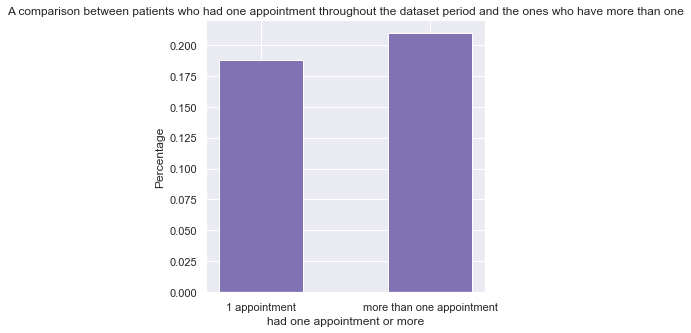

In [56]:
plt.figure(figsize=(5,5))
plt.bar(df_more.index, df_more['No_show_up_%'], width = 0.5, color= 'm')
plt.title('A comparison between patients who had one appointment throughout the dataset period and the ones who have more than one')
plt.xlabel('had one appointment or more')
plt.xticks([0,1],['1 appointment', 'more than one appointment'])
plt.ylabel('Percentage')

Both groups missed almost equal percentage of appointments.However, the figure for the ones who had more than one appointment was a little higher.

### can we find any relationship with the amount of time between appointment day and scheduleday and apperance on appointment date?

when we look at the table, there are two datetime format columns.first one is the date when patients decided to visit a doctor (ScheduledDay) and the second one is the date when they reserved a day to come (AppointmentDay). There is a gap between these to date, ranging from hours to seasons. so, which time gap make more patients miss the appointment date?

In [36]:
df_difference = no_show_up('Difference')
df_difference.head()

,Total,Show_up,No_show_up,No_show_up_%
Difference,,,,
0 days,38563,36771,1792,0.046469
1 days,5213,4100,1113,0.213505
2 days,6725,5123,1602,0.238216
3 days,2737,2093,644,0.235294
4 days,5290,4059,1231,0.232703


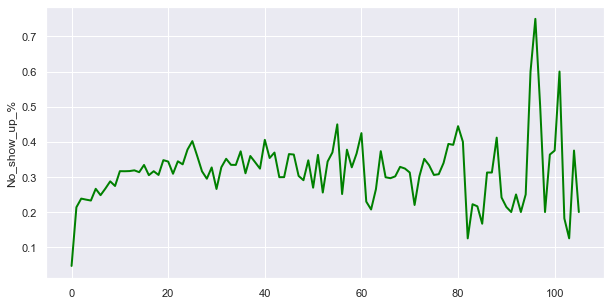

In [37]:
plt.figure(figsize=(10,5))

sns.lineplot(x= df_difference.reset_index().index, y= df_difference['No_show_up_%'], color="green",linewidth=2, data = df_difference)

without any doubt, when there is a gap less than 20 days, the more scheduled day and appointment day are closer to each other,the higher the chance that patients show up on the appointment date. there are some fluctuations after 20 days which is not entirely reliable, but we have gap times with no show up rate of 70 percent, which is absolutely odd.

### Can we predict which patients will show up on the appointment date?

In [38]:
# change difference column format to integer
df['Difference'] = df['Difference'].astype(str).str.slice(stop = 1)

# clean some data
df['Difference'] = df[df['Difference'] == '-'].replace('-', 1)
df['Difference'] = df.loc[71533,'Difference'] = 6

In [39]:
#define features and labels
X = np.asarray(df[['Gender','Difference', 'Age', 'Scholarship','Hipertension','Diabetes','Alcoholism','Handicap','SMS_received']])
y = np.asarray(df['No_show'])

In [40]:
X[0:2]

array([['F', 6, 62, 0, 1, 0, 0, 0, 0],
       ['M', 6, 56, 0, 0, 0, 0, 0, 0]], dtype=object)

In [41]:
# change Gender to binary format
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,0] = le_sex.transform(X[:,0])
X[0:2]

array([[0, 6, 62, 0, 1, 0, 0, 0, 0],
       [1, 6, 56, 0, 0, 0, 0, 0, 0]], dtype=object)

In [42]:
#Standardize the array
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-0.73383659,  0.        ,  1.07793269, -0.33011206,  2.01737783,
        -0.27826108, -0.1770676 , -0.14385825, -0.68761155],
       [ 1.36270119,  0.        ,  0.81830578, -0.33011206, -0.49569297,
        -0.27826108, -0.1770676 , -0.14385825, -0.68761155]])

In [43]:
# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (88421, 9) (88421,)
Test set: (22106, 9) (22106,)


In [44]:
#Train the data 
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
yhat [0:5]

C:\Users\Sahand\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [45]:
#compute the accuracy with F1 and Jaccard index metrics
print('F1',f1_score(y_test, yhat, average='weighted'))
print('Jaccard', jaccard_similarity_score(y_test, yhat))

F1 0.7091884314807266
Jaccard 0.7978376911245816


C:\Users\Sahand\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


<a id='conclusions'></a>
## 4- Conclusions



In this data analytic project, the sole aim was to find any correlation between variables and apperance on appointment date to answer the question "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment". At first we simply categorise table based on each viable feature to compare the results and find any correlation.

With regard to neighbourhood, we have found the most and the least notorious neighborhoods where patients missed the appointment date. it can help us see whther geographical disparity have any impact or not.
then the gender was scrutinized to see whether men or women tend to miss the appointment. although the total namuber of female patients was considerably higher than male ones, the total percentage of not showing up was equal in both groups,showing that gender did not play any important role on missing appointments.

Now it is time so see whether the facilities provided by government (scholarship) and healthcare institutes (sms_received) were helpful or not? interestingly, patients without these facilities show up more. even the ones who received a notification via sms and had scholarship missed more appointment date. this trend need to be examined deeper to understand why this is the trend.
then we decide to group patients who have inabilities such as handicap or some health issues such as diabetes to see are these groups tend to appear on scheduled appointment or not. as it could be predicted, patients with inability tend to appear more on appointment date than healthy ones. the more problem they have, the more keen they become to be there on time!

In this dataset, patient's age ranged from infant period to more than 100 years old (we have a 115 years old patient). so, it was hard to find any pattern based on each one.the remedy was to categorise them into 4 groups. finally, it can be seen that young adults tend to miss the appointment more than any other groups. old ones find it more risky and do their best to visit their doctors.
in more advanced analysis, we found out that there were patients who had more than one appointment date throughout the period. so, we have found them, separate them and compare them with patients who have made an appointment once to see whether the ones experienced an appointment are more lazy to miss a date or not. there were some differences between them but not meaningful enough.
And finally, we decided to find how many days are between scheduled date and appointment date. this can show us whether distances between these two dates can have a meaningful effect or not. for the first 2o days we could find a relationship. it seems that the more these 2 dates are close to each other, there is a higher chance patients will show up on the scheduled appointment.

In machine learning part, we did our best to train an algorithm to predict future No-show appointment,when we give information of patients. in this way we can predict which patients will show up with a rate of 70 precent. that is not a perfect model, but with the help of grid search and ridge regression, we can improve our model to get better results. but this was out of scope of this project.so, we only run a simple mode of support vector machine (SVM) algorithm to show the possibility of the model.




# Limitations

in this project, we could dive deeper in each feature and compare them with other hypothetical situations. for example, we have categorised patients who have made an appointment more than once. now we can see age group in this category and at the same time, compare the Difference feature defined above. but it would be out of scope of this project.so, we have just analysed features in 1 level.

